In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


# Read the CSV and Perform Basic Data Cleaning

In [6]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [20]:
X = df.drop('koi_disposition', axis=1).values.reshape(6991, 40)
y = df['koi_disposition'].values.reshape(6991, 1)

# X = pd.get_dummies(X) not needed because no catagorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train.reshape(-1,1))

#Transform the training and testing data using the X_scaler and y_scaler models
# Standard scaler if aren't sure if there are outliers, if outliers use standard scaler.
# use min max if no outliers

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Select your features (columns)

In [30]:
# Set features. This will also be used as your x values.
selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# Create a Train Test Split

Use `koi_disposition` for the y values

k: 1, Train/TestScore:  1.000/ 0.601
k: 3, Train/TestScore:  0.791/ 0.624
k: 5, Train/TestScore:  0.746/ 0.625
k: 7, Train/TestScore:  0.727/ 0.637
k: 9, Train/TestScore:  0.717/ 0.636
k: 11, Train/TestScore:  0.712/ 0.639
k: 13, Train/TestScore:  0.706/ 0.644
k: 15, Train/TestScore:  0.698/ 0.641
k: 17, Train/TestScore:  0.691/ 0.634
k: 19, Train/TestScore:  0.687/ 0.634
k: 21, Train/TestScore:  0.686/ 0.632
k: 23, Train/TestScore:  0.682/ 0.639
k: 25, Train/TestScore:  0.682/ 0.636
k: 27, Train/TestScore:  0.678/ 0.640
k: 29, Train/TestScore:  0.675/ 0.636
k: 31, Train/TestScore:  0.674/ 0.630
k: 33, Train/TestScore:  0.672/ 0.636
k: 35, Train/TestScore:  0.669/ 0.626
k: 37, Train/TestScore:  0.667/ 0.628
k: 39, Train/TestScore:  0.667/ 0.633
k: 41, Train/TestScore:  0.668/ 0.637
k: 43, Train/TestScore:  0.667/ 0.631
k: 45, Train/TestScore:  0.668/ 0.628
k: 47, Train/TestScore:  0.665/ 0.630
k: 49, Train/TestScore:  0.665/ 0.628
k: 51, Train/TestScore:  0.666/ 0.626
k: 53, Train/Test

<function matplotlib.pyplot.show(*args, **kw)>

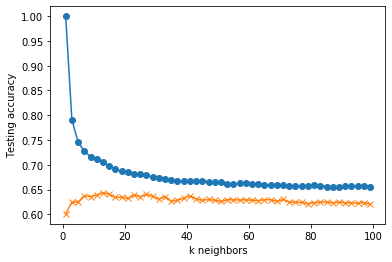

In [40]:
# k is the number of closest neighbors 1,3,5,7
train_scores=[]
test_scores=[]



for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/TestScore: {train_score: .3f}/{test_score: .3f}")
    
plt.plot(range(1,20,2), train_scores, marker = 'o')
plt.plot(range(1,20,2), test_scores, marker = 'x')
plt.xlabel('k neighbors')
plt.ylabel('Testing accuracy')
plt.show

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)